In [373]:
# you can use github 
#pip install git+https://github.com/tensorflow/docs

In [374]:
#importing the libraries
import numpy as np # for math and arrays
import pandas as pd # data from for the data.
import seaborn as sns # for plotting.
# for plotting 
import matplotlib
import matplotlib.pyplot as plt # for plotting data and creating different charts.

# for the operating system operations e.g., creating a folder.
import os

# Tensorflow and Keras are two packages for creating neural network models.
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import seaborn as seabornInstance
# import NN layers and other componenets.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Dropout
from tensorflow.keras import optimizers

# Tensorflow untils packages.
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling
import pathlib # for processing a path e.g., c:\documents\files\test_ds.csv

#upload data from my github
data = pd.read_csv("https://raw.githubusercontent.com/smomtahe/ai/main/patient13_DL.csv")
data.head()

,i690,i750,i800,i850,ii690,ii750,ii800,ii850,Ambient,a690,aa690,patient 13-slice4-unhealthy
0,57678,58264,57866,48048,3465,3664,3635,3414,3379,0.1574,0.2255,NaN
1,55625,56241,55718,46299,3458,3700,3645,3435,3402,0.1574,0.1835,NaN
2,53507,54388,53577,44621,3459,3685,3655,3431,3394,0.1574,0.3714,NaN
3,51777,52657,51405,43005,3468,3730,3715,3444,3400,0.1574,0.2808,NaN
4,49608,50482,49428,41081,3518,3780,3701,3477,3421,0.1574,0.3691,NaN


In [375]:
# subtract ambient light from the refletance values
data['i690']=np.subtract(data['i690'],data['Ambient'])
data['i750']=np.subtract(data['i750'],data['Ambient'])
data['i800']=np.subtract(data['i800'],data['Ambient'])
data['i850']=np.subtract(data['i850'],data['Ambient'])
data['ii690']=np.subtract(data['ii690'],data['Ambient'])
data['ii750']=np.subtract(data['ii750'],data['Ambient'])
data['ii800']=np.subtract(data['ii800'],data['Ambient'])
data['ii850']=np.subtract(data['ii850'],data['Ambient'])
data=data.drop(['Ambient'],axis=1)
data=data.drop(['patient 13-slice4-unhealthy'],axis=1)

data.head()

,i690,i750,i800,i850,ii690,ii750,ii800,ii850,a690,aa690
0,54299,54885,54487,44669,86,285,256,35,0.1574,0.2255
1,52223,52839,52316,42897,56,298,243,33,0.1574,0.1835
2,50113,50994,50183,41227,65,291,261,37,0.1574,0.3714
3,48377,49257,48005,39605,68,330,315,44,0.1574,0.2808
4,46187,47061,46007,37660,97,359,280,56,0.1574,0.3691


In [376]:
# define a function to normalize the data set.
def norm(x):
    return (x - np.min(x)) / (np.max(x) - np.min(x))
data = norm(data)
data.head()

,i690,i750,i800,i850,ii690,ii750,ii800,ii850,a690,aa690
0,0.909041,0.939818,0.952682,0.799968,0.005130,0.004131,0.001247,0.001459,0.1574,0.2255
1,0.874278,0.904718,0.914606,0.768169,0.004307,0.004349,0.001028,0.001410,0.1574,0.1835
2,0.838946,0.873066,0.877197,0.738201,0.004554,0.004232,0.001331,0.001509,0.1574,0.3714
3,0.809876,0.843266,0.838998,0.709094,0.004636,0.004887,0.002241,0.001682,0.1574,0.2808
4,0.773205,0.805593,0.803957,0.674192,0.005432,0.005374,0.001651,0.001979,0.1574,0.3691


In [377]:
train_dataset=data.iloc[128:]  
train_dataset 

x_train=train_dataset.pop("i690")

x_train

128     0.948576
129     0.908438
130     0.875316
131     0.843584
132     0.809675
          ...   
1147    0.015272
1148    0.014786
1149    0.014384
1150    0.013597
1151    0.014133
Name: i690, Length: 1024, dtype: float64

In [378]:
test_dataset=data.iloc[:128]  # next 25% of data : the rest of data
test_dataset 

,i690,i750,i800,i850,ii690,ii750,ii800,ii850,a690,aa690
0,0.909041,0.939818,0.952682,0.799968,0.005130,0.004131,0.001247,0.001459,0.1574,0.2255
1,0.874278,0.904718,0.914606,0.768169,0.004307,0.004349,0.001028,0.001410,0.1574,0.1835
2,0.838946,0.873066,0.877197,0.738201,0.004554,0.004232,0.001331,0.001509,0.1574,0.3714
3,0.809876,0.843266,0.838998,0.709094,0.004636,0.004887,0.002241,0.001682,0.1574,0.2808
4,0.773205,0.805593,0.803957,0.674192,0.005432,0.005374,0.001651,0.001979,0.1574,0.3691
...,...,...,...,...,...,...,...,...,...,...
123,0.006346,0.005284,0.002666,0.001005,0.521685,0.798133,0.815055,0.487422,0.2992,0.2109
124,0.005744,0.003345,0.002087,0.001274,0.544784,0.833532,0.852482,0.511712,0.0137,0.2109
125,0.006045,0.005284,0.001982,0.001561,0.573670,0.869167,0.889842,0.535038,0.4136,0.2109
126,0.005208,0.003843,0.001947,0.002010,0.598003,0.904448,0.933572,0.560937,0.0982,0.2109


In [379]:
#print(f"Display the datatype of the test_dataset: {type(test_dataset)}")
print(f" Train dataset       : {train_dataset.shape}")
print(f" Test dataset       : {test_dataset.shape}")
print(f" Validation dataset : {valid_dataset.shape}")

 Train dataset       : (1024, 9)
 Test dataset       : (128, 10)
 Validation dataset : (128, 10)


In [380]:
n_samlpes, n_features=data.shape
print(n_samlpes)
print(n_features)

1152
10


In [387]:
features=['i690'	]
x=data[features]
y=data['a690']

x_test=x.iloc[:128] 
#x_train=x.iloc[128:256] 
x_train=x.iloc[128:]
y_test=y.iloc[:128] 
#y_train=y.iloc[128:256] 
y_train=y.iloc[128] 

x_train.shape
#features2=['ii690'	,'ii750',	'ii800',	'ii850']
#x2=data[features2]
#y2=['a690']

(1024, 1)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


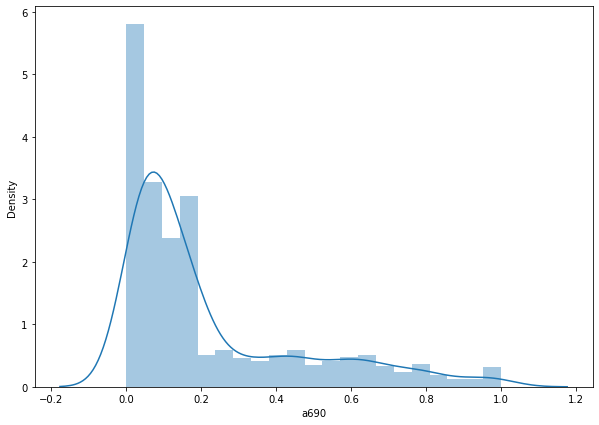

In [382]:
plt.figure(figsize=(10,7))
plt.tight_layout()
seabornInstance.distplot(data['a690'])

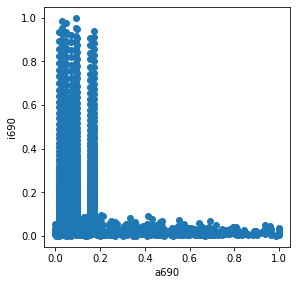

In [383]:
plt.figure(figsize=(15,15))
for index, feature_name in enumerate(data[features]):
  plt.subplot(3,3,index+1)
  plt.scatter(data['a690'],data[feature_name])
  plt.xlabel('a690',size=10)
  plt.ylabel(feature_name,size=10)


In [384]:
from sklearn.metrics import classification_report
import statsmodels.api as sm
%matplotlib inline
model=sm.OLS(y_train,x_train).fit()
predictions=model.predict(x_test)
from sklearn.metrics import accuracy_score
model=sm.OLS(y,x)
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   a690   R-squared (uncentered):                   0.033
Model:                            OLS   Adj. R-squared (uncentered):              0.033
Method:                 Least Squares   F-statistic:                              39.77
Date:                Wed, 25 Jan 2023   Prob (F-statistic):                    4.06e-10
Time:                        03:05:53   Log-Likelihood:                         -325.74
No. Observations:                1152   AIC:                                      653.5
Df Residuals:                    1151   BIC:                                      658.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
i690           0.1959      0.031      6.307      0.000       0.135       0.257
==============================================================================
Omnibus:                      223.169   Durbin-Watson:                   0.500
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              363.566
Skew:                           1.315   Prob(JB):                     1.13e-79
Kurtosis:                       3.811   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [385]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)
train_score=regressor.score(x_train,y_train)
print('training accuracy:',train_score)
test_score=regressor.score(x_test,y_test)
print('training accuracy:',test_score)

training accuracy: 0.14216783779511843
training accuracy: 0.031126801295993434


In [386]:
y_pred=regressor.predict(x_test)
from sklearn.metrics import classification_report
df=pd.DataFrame({'actual':y_test,'prediction':y_pred})
df

,actual,prediction
0,0.1574,-0.022343
1,0.1574,-0.011788
2,0.1574,-0.001061
3,0.1574,0.007766
4,0.1574,0.018900
...,...,...
123,0.2992,0.251736
124,0.0137,0.251919
125,0.4136,0.251827
126,0.0982,0.252082
